# Язык программирования Python

## Домашнее задание | СКБ

### Модуль 2

## Numpy [12/100]

При решении задач этого раздела подразумевается максимальное использование возможностей `Numpy`.

За использование любых сторонних циклов и их заменителей (итераторов, генераторов и др.) выставляется штраф.

### Numpy [A]

В файле `elements.npz` расположены два массива:
- `nodes` - массив (N, 2), содержащий координаты точек (float)
- `tris` - массив (M, 3), содержащий тройки индексов (i, j, k) такие, что точки с индексами i, j, k из массива `nodes` образуют треугольник

Требуется для всех треугольников:
- вычислить:
    - координаты геометрических центров
    - площади
    - величины минимальных углов
- проверить утверждение:
    - во всех треугольниках вершины расположены по/против часовой стрелки

In [ ]:
from numpy.lib.function_base import vectorize
import numpy as np

# Загрузка данных
arr = np.load('elements.npz')

# np.vectorize(int)(arr['tris']) - преобразовать все индексы в int
# arr['nodes'][%] - выбрать все треугольники по индексам ^
arr = arr['nodes'][np.vectorize(int)(arr['tris'])]
arr

array([[[ 0.        ,  9.        ],
        [ 0.        ,  8.        ],
        [ 0.2       ,  8.28421053]],

       [[ 1.        , 10.        ],
        [ 1.71578947,  9.8       ],
        [ 2.        , 10.        ]],

       [[ 0.70526316,  9.8       ],
        [ 1.        , 10.        ],
        [ 0.        , 10.        ]],

       ...,

       [[ 2.72631579,  0.70526316],
        [ 2.72631579,  0.2       ],
        [ 3.23157895,  0.70526316]],

       [[ 2.72631579,  0.2       ],
        [ 2.22105263,  0.70526316],
        [ 2.22105263,  0.2       ]],

       [[ 2.72631579,  0.2       ],
        [ 2.72631579,  0.70526316],
        [ 2.22105263,  0.70526316]]])

In [ ]:
# Координаты геометрических центров
#
# np.average(%, axis=1) - среднее координат х и y (отдельно) в полученных треугольниках - координаты геометрических центров
tr_centers = np.average(arr, axis=1)
tr_centers
0

0

In [ ]:
# Площади треугольников
#
# triangle_area - функция для вычисления площади треугольника по координатам вершин
# accumulate_vectors_area - функция для "сбора" трех координат и последующего вычисления площади
# np.apply_along_axis последовательно применяет accumulate_vectors_area к каждой координате

def triangle_area(p1, p2, p3):
  return np.abs((p2[0] - p1[0]) * (p3[1] - p1[1]) - 
                (p3[0] - p1[0]) * (p2[1] - p1[1])) / 2


_p1, _p2, _p3 = [None] * 3
def accumulate_points_area(_p):
  global _p1, _p2, _p3
  if _p1 is None:
    _p1 = _p
  elif _p2 is None:
    _p2 = _p
  else:
    _p3 = _p
    res = triangle_area(_p1, _p2, _p3)
    _p1, _p2, _p3 = [None] * 3
    return res

tr_areas = np.apply_along_axis(accumulate_points_area, arr=arr, axis=2)[:, 2]
tr_areas
0

0

In [ ]:
# Величины минимальных углов
#
# angle_between_vectors - функция для подсчета угла между векторами (в радианах). Перевести в градусы -> np.degree()
# accumulate_vectors_angle - функция для "сбора" трех координат и последующего вычисления минимума из трех углов
# np.apply_along_axis последовательно применяет accumulate_vectors_angle к каждой координате

def angle_between_vectors(v1, v2):
  return np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))


_p1, _p2, _p3 = [None] * 3
def accumulate_points_angle(_p):
  global _p1, _p2, _p3
  if _p1 is None:
    _p1 = _p
  elif _p2 is None:
    _p2 = _p
  else:
    _p3 = _p
    res = min(angle_between_vectors(_p1 - _p2, _p1 - _p3),
              angle_between_vectors(_p2 - _p1, _p2 - _p3),
              angle_between_vectors(_p3 - _p1, _p3 - _p2))
    _p1, _p2, _p3 = [None] * 3
    return np.degrees(res)


np.apply_along_axis(accumulate_points_angle, arr=arr, axis=2)[:, 2]
0

0

In [ ]:
# Проверка гипотезы "во всех треугольниках вершины расположены по/против часовой стрелки"
#
# is_clockwise - функция для проверки расположения точек по часовой стрелке
# accumulate_points_clockwise - функция для "сбора" трех координат и последующей проверки ^^^
# np.apply_along_axis последовательно применяет accumulate_points_clockwise к каждой координате
# Если массив состоит только из True, то все точки расположены по часовой стрелке
# Если массив состоит только из False, то все точки расположены против часовой стрелки
# Если массив состоит из True и False, то гипотеза неверна

def is_clockwise(_p1, _p2, _p3):
  p2 = _p2 - _p1
  p3 = _p3 - _p1
  a2 = np.angle(p2[0] + p2[1] * 1j)
  a3 = np.angle(p3[0] + p3[1] * 1j)
  if np.abs(a2 - a3) > np.pi:
    a2 %= np.pi * 2
    a3 %= np.pi * 2
  return a2 > a3


_p1, _p2, _p3 = [None] * 3
def accumulate_points_clockwise(_p):
  global _p1, _p2, _p3
  if _p1 is None:
    _p1 = _p
  elif _p2 is None:
    _p2 = _p
  else:
    _p3 = _p
    res = is_clockwise(_p1, _p2, _p3)
    _p1, _p2, _p3 = [None] * 3
    return res


is_clockwise_array = np.apply_along_axis(accumulate_points_clockwise, arr=arr, axis=2)[:, 2]
if True in is_clockwise_array:
  if False in is_clockwise_array:
    print('Гипотеза неверна')
  else:
    print('Все точки расположены по часовой стрелке')
else:
  print('Все точки расположены против часовой стрелки')

Все точки расположены против часовой стрелки


### Numpy [B]

В файле `encrypted.png` находится зашифрованное сообщение, которое следует отыскать. В одном из слоев изображения размещен текст сообщения и поверх него наложен шум. Такой же шум, но подверженный измененениям, сохранен в другом слое изображения. Изменения включают в себя: перестановки четвертей изображения, их повороты, транспонирования, отражения, инвертирования. Ориентируясь по символам, размещенным поверх шума, нужно сделать два упомянутых выше слоя как можно более похожими друг на друга, после чего вычитание одного из другого поможет удалить шум и открыть сообщение.

In [ ]:
import numpy as np
from PIL import Image

img_array = np.asarray(Image.open('encrypted.png').convert('RGB'))
img_what = Image.fromarray(img_array)
img_what
0

0

In [ ]:
img_first_array = np.hstack([np.transpose(np.rot90(img_array[:256][:,:256:]), axes=[1,0,2]), np.fliplr(img_array[:256][:,256:])]) - np.hstack([img_array[256:][:,:256:], img_array[256:][:,256:]])
img_first = Image.fromarray(img_first_array)
img_first
0

0

In [ ]:
img_array_r_all = img_array[:, :, 0]
img_r_all = Image.fromarray(img_array_r_all)
img_r_all
0

0

In [ ]:
img_array_b_up = np.invert(np.hstack([np.flipud(img_array[:256,256::,2]), np.fliplr(img_array[:256,:256:,2])]))
img_b_up = Image.fromarray(img_array_b_up)
img_b_up
0

0

In [ ]:
img_array_b_down = np.hstack([np.rot90(np.rot90(np.flipud(img_array[256:,:256:,2]))), np.fliplr(np.rot90(img_array[256:,256::,2]))])
img_b_down = Image.fromarray(img_array_b_down)
img_b_down
0

0

In [ ]:
img_array_b_all = np.vstack([img_array_b_up, img_array_b_down])
img_b_all = Image.fromarray(img_array_b_all)
img_b_all
0

0

In [ ]:
img_array_r_b_all = img_array_b_all - img_array_r_all
img_r_b_all = Image.fromarray(img_array_r_b_all)
img_r_b_all
0

0

## Matplotlib [10/100]

### Matplotlib [A]

Используя данные из задачи **Numpy [A]** визуализировать:
- точки
- треугольники (цветом треугольника показать его площадь)
- центры треугольников

Выполнить поворот всех треугольников относительно их общего центра на 30 градусов и повторно визуализировать, как указано выше.

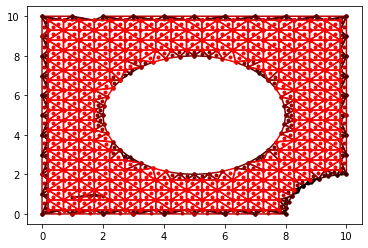

In [ ]:
import matplotlib.pyplot as plt


def plot_triangles(points_array, centers_array):
  tr = points_array
  tr_x = tr[:,:,0]
  tr_y = tr[:,:,1]
  colors = tr_areas
  color_min, color_max = min(colors), max(colors)


  for i in range(len(tr_x)):
    xx = np.hstack([tr_x[i], tr_x[i, 0]])
    yy = np.hstack([tr_y[i], tr_y[i, 0]])
    color = ((colors[i] - color_min) / (color_max - color_min), 0, 0)
    plt.plot(xx, yy, c=color)
    plt.plot(centers_array[i, 0], centers_array[i, 1], '.', c=color)
    for j in range(3):
      plt.plot(xx[j], yy[j], '.', c=color)


plot_triangles(arr, tr_centers)

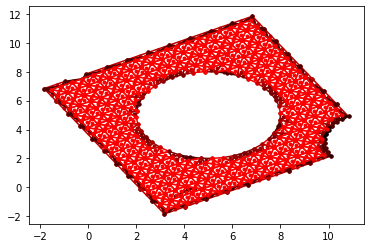

In [ ]:
import scipy

# Максимальное и минимальное значения x и y:
x_max, x_min = max(arr.ravel()), min(arr.ravel())
y_max, y_min = max(arr.ravel()), min(arr.ravel())

# Координата общего центра всех треугольников:
x_average, y_average = np.average([x_max, x_min]), np.average([y_max, y_min])

def rot_point(_p):
  return (((_p[0] - x_average) * np.cos(np.radians(30)) - 
           (_p[1] - y_average) * np.sin(np.radians(30)) + x_average),
          ((_p[0] - x_average) * np.sin(np.radians(30)) + 
           (_p[1] - y_average) * np.cos(np.radians(30)) + y_average))

rot_arr = np.apply_along_axis(rot_point, arr=arr, axis=2)
rot_tr_centers = np.apply_along_axis(rot_point, arr=tr_centers, axis=1)
plot_triangles(rot_arr, rot_tr_centers)

### Matplotlib [B]

Повторить рисунок:

![arctan_x_cos_y.png](arctan_x_cos_y.png)

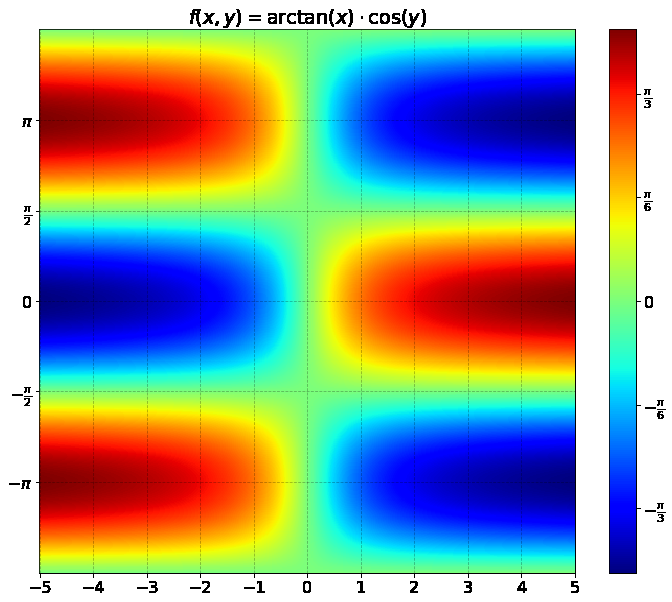

In [ ]:
from PIL import Image

Image.open('arctan_x_cos_y.png').convert('RGB')

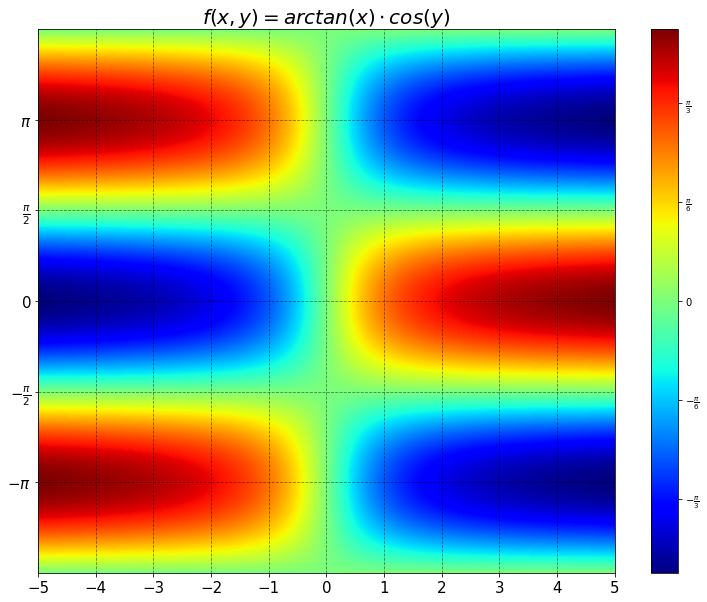

In [ ]:
from matplotlib import colorbar
from numpy.core.fromnumeric import size
x = np.linspace(-5, 5, 512)
y = np.linspace(-3 / 2 * np.pi, 3 / 2 * np.pi, 512).reshape(-1, 1)
z = np.arctan(x) * np.cos(y)

fig, ax = plt.subplots(1, 1, figsize=(13, 10))
im = ax.imshow(z, cmap='jet', interpolation='bilinear',
               extent=[x.min(), x.max(), y.min(), y.max()])

cbar = fig.colorbar(im)
cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
cbar.set_ticklabels([tick for tick in [r'$-\frac{\pi}{3}$', r'$-\frac{\pi}{6}$', r'0', r'$\frac{\pi}{6}$', r'$\frac{\pi}{3}$']])
plt.xticks(np.arange(-5, 5.1, 1), size=15)
plt.yticks(np.arange(-np.pi, np.pi + 0.1, 1 / 2 * np.pi), [tick for tick in [r'$-\pi$', r'$-\frac{\pi}{2}$', r'0', r'$\frac{\pi}{2}$', r'$\pi$']], size=15)
ax.grid(ls='--', c='black', alpha=0.5)
ax.set_title(r'$f(x, y) = arctan(x) \cdot cos(y)$', size=20)

fig.savefig('arctan_x_cos_y_2.png', dpi=300, bbox_inches='tight');

## Pandas [18/100]

При решении задач этого раздела подразумевается максимальное использование возможностей `pandas` и допускается использование `numpy`.

За использование любых сторонних циклов и их заменителей (итераторов, генераторов и др.) выставляется штраф.

### Pandas [A]

В файле `fin.csv` находятся записи о доходах и расходах физического лица.

Требуется рассчитать:

- среднемесячный доход для каждого года,
- среднемесячный расход по каждой категории для каждого года,
- сводную таблицу суммарных расходов: строки - Категория/Год, столбцы - Месяц,
- состояние счета физического лица на каждый день и изобразить график (в начальный момент времени счет был нулевым),
- даты, когда счет становился отрицательным,
- построить прогноз (линейный и квадратичный) состояния счета через год после последней записи.

### Pandas [B]

В файле `students.csv` находится список студентов. 
В файле `grades.csv` - оценки за контрольную работу.

Столбец `hash` однозначно идентифицирует студента.

Контрольная работа состояла из 8 заданий. Веса всех заданий - одинаковые.

Требуется ответить на вопросы / вычислить:
- кто написал контрольную работу, а кто - нет?
- средняя оценка по каждому заданию у каждой группы? по всем заданиям у каждой группы?
- топ-5 лидеров и топ-5 отстающих.

По информации об оценках:
- выделить 2 главных компоненты при помощи `sklearn.decomposition.PCA`;
    - визуализировать результат `plt.scatter`;
    
    
- разбить на 4 кластера при помощи `sklearn.cluster.k_means`;
    - визуализировать предыдущий массив, используя в качестве цвета номер кластера;
    - на том же рисунке отметить центр кластера и подписать его номер;
    - вычислить для каждого кластера среднюю и медианную оценки;
    - для каждого кластера вывести номера групп.


## Scipy [15/100]

При решении задач этого раздела подразумевается использование методов и алгоритмов в `Scipy`.


### Scipy [A]

Построить 10 фазовых траекторий $\dot x(x), \dot y(y)$, а также зависимостей $y(x)$ для задачи "хищник-жертва"; подписать оси

Задача "хищник-жертва" описывается моделью Лотки-Вольтерры:

$\dot x = \alpha x - \beta x y$

$\dot y = \delta x y - \gamma y$

где $x(t)$ - размер популяции жертв, $y(t)$ - размер популяции хищников.

Параметры модели $\alpha, \beta, \gamma, \delta$ выбрать самостоятельно.

Начальные условия взять на линии $y = x$ на отрезке $[0.1, 1.1]$.

Вычислить период колебаний размеров популяций жертв и хищников.

### Scipy [B]

Численно определить период колебаний [математического маятника](https://ru.wikipedia.org/wiki/Математический_маятник) для всех режимов его движения:
- малые колебания (гармонические),
- большие колебания,
- вращение с переходом через неустойчивое положение равновесия.

Для одного периода колебаний построить графики: 
- изменения угла и угловой скорости от времени $\theta(t), \dot \theta(t)$.
- фазовой траектории $\dot \theta(\theta)$

При помощи `holoviews` создать анимированный график движения маятника в координатной и фазовой плоскостях, схожего с приведенными по [ссылке](https://ru.wikipedia.org/wiki/Математический_маятник).

## Numba [15/100]

При решении задач этого раздела подразумевается использование возможностей `numba` и допускается использование `joblib`.

### Numba [A]

Создать функции для расчета [фрактала Ляпунова](https://ru.wikipedia.org/wiki/Фрактал_Ляпунова), откомпилировать и распараллелить расчеты, используя возможности `numba` или `joblib`.
Построить интерактивный рисунок с возможностью перемещения и масштабирования фрактала при помощи `holoviews`.


### Numba [B]

Реализовать метод численного интегрирования [Рунге-Кутты](https://ru.wikipedia.org/wiki/Метод_Рунге_—_Кутты) 4 порядка с постоянным шагом по времени. 
Выполнить компиляцию при помощи `numba`.

Сравнить время вычислений при решении задачи Коши для модели, описанной в задаче **Scipy [B]**:
- scipy.integrate.solve_ivp (метод `DOPRI5`)
- scipy.integrate.ode (метод `DOPRI5`)
- ваша реализация


## Classes [15/100]

Создать иерархию классов `Shape` $\leftarrow$ `Circle`, `Rectangle`, `Union`, `Intersection`, `Not`.

Класс `Shape` содержит абстрактные методы `draw(self, ax=None)`, `distance(self, x, y)`.

Вся иерархия должна содержать:
- конструктор `__init__`:
    - классы `Circle` и `Rectangle` получают необходимые координаты, размеры, цвет;
    - классы `Union`, `Intersection`, `Not` получают ссылки на другие объекты наследников класса `Shape`;
    
    
- метод `draw(self, ax=None)`, который отрисовывает объект при помощи `matplotlib`:
    - `ax` - оси рисунка `matplotlib`; если `ax==None`, то рисовать в текущих осях;
    - `Circle` и `Rectangle` отображают себя при помощи `plt.Circle`, `plt.Rectangle`;
    - классы `Union`, `Intersection`, `Not` отображают объекты, на которых они построены;
    
    
- метод `distance(self, x, y)` возвращает расстояние от границы объекта до точки `(x, y)`:
    - расстояние должно иметь знак, т.е., если точка внутри объекта, то расстояние должно быть отрицательным;
    - `Union.distance` = минимальное из расстояний от точки до всех его объектов;
    - `Intersection.distance` = максимальное из расстояний от точки до всех его объектов;
    - `Not.distance` = расстояние, взятое с обратным знаком.

Необходимо:
- cоздать не менее одного объекта каждого класса (кроме `Shape`) и построить один сборный объект `f`;
- визуализировать объект `f` (должен корректно отработать его метод `draw`);
- вычислить метод `f.distance` на регулярной решетке размером 200х200 точек (решетка должна покрывать весь объект `f`);
- визуализировать полученную матрицу расстояний, например при помощи `plt.pcolormesh`;
- на этом же рисунке изобразить контурную линию уровня 0 (`plt.contour`).

Пример:

```
c1 = Circle(5, 5, 3, color=(1, 0, 0, 0.5))
c2 = Circle(6.5, 6.5, 1, color=(0, 1, 0, 0.5))
c3 = Circle(3.5, 3.5, 1, color=(0, 1, 0, 0.5))
c4 = Circle(6.5, 3.5, 1, color=(0, 1, 0, 0.5))
c5 = Circle(3.5, 6.5, 1, color=(0, 1, 0, 0.5))
c6 = Circle(5, 5, 1, color=(0, 1, 0, 0.5))
r = Rect(3.5, 3.5, 6.5, 6.5, color=(0, 0, 1, 0.5))
u = Intersection(Intersection(Union(r, c2, c3, c4, c5), c1), Not(c6))
```

<table>
    <tr>
        <td><img src='classes_plot.png' width=350/></td>
        <td><img src='classes_sdf.png' width=400/></td>
    </tr>
</table>

Полезные ссылки:
- [Основы Signed Distance Field в 2D](https://habr.com/ru/post/438316/)

## generators [15/100]

При решении задач этого раздела необходимо создать генераторы, т.е. функции, позволяющие вычислять следующий элемент последовательности. Допускается конструирование на основе существующих генераторов (напр., `range`, `map`, и т.д.)


## generators [A]

Создать генераторы `dot`, `matmul` для вычисления скалярного произведения двух списков и матричного произведений двух матриц, заданных списками списков.

In [ ]:
def dot(list_1, list_2):
  i = 0
  while True:
    try:
      yield np.dot(list_1[i], list_2[i])
      i += 1
    except IndexError:
      raise StopIteration


def matmul(list_1, list_2):
  i = 0
  while True:
    try:
      yield np.matmul(list_1[i], list_2[i])
      i += 1
    except IndexError:
      raise StopIteration

In [ ]:
v1 = [[1,2,3], [2,3,4], [3,4,5], [4,5,6]]
v2 = [[2,3,4], [3,4,5], [4,5,6]]
d = dot(v1, v2)

m1 = [[[1,2,3], [1,2,3], [1,2,3]],
      [[2,3,4], [2,3,4], [2,3,4]],
      [[1,1,1], [1,1,1], [1,1,1]],
      [[1,2], [3,4]]
      ]
m2 = m1
mm = matmul(m1, m2)

In [ ]:
n_dot = 0
np.dot(v1[n_dot], v2[n_dot]), next(d)

(20, 20)

In [ ]:
n_matmul = 0
np.matmul(m1[n_matmul], m2[n_matmul]), next(mm)

(array([[ 6, 12, 18],
        [ 6, 12, 18],
        [ 6, 12, 18]]), array([[ 6, 12, 18],
        [ 6, 12, 18],
        [ 6, 12, 18]]))

## generators [B]

Создать генератор `progress`, работающий аналогично `range` и дополнительно выводящий на экран `progress bar` (полосу прогресса).

Для реализации полосы прогресса можно, например, воспользоваться виджетом `panel.indicators.Progress` из модуля `panel`, установленного вместе с `holoviews`.

Продемонстрировать работу генератора в цикле вызвав функцию `sleep` из модуля `time`.

In [ ]:
from progressbar import ProgressBar

def progress(*args, step=None):
  start = 0

  if len(args) == 1:
    stop = args[0]
  elif len(args) == 2:
    start, stop = args
  elif len(args) == 3:
    start, stop = args[0:2]
  
  bar = ProgressBar(maxval=stop - 1)
  bar.start()
  try:
    for n in range(*args):
      bar.update(n)
      yield n
  except:
    bar.finish()
    raise

In [ ]:
import time

l = []
for i in progress(50):
  l += [i]
  time.sleep(0.1)
print('\n', l)

100% (49 of 49) |########################| Elapsed Time: 0:00:04 ETA:  00:00:00


 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
